<a href="https://colab.research.google.com/github/RaulMirabal28/ChallengeTelecomX_Parte2/blob/main/ChallengeTelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd

In [163]:
df = pd.read_csv('/content/datos_tratados.csv')

In [164]:
df.head()

IDCliente  Cancelacion  Genero  MayorDeEdad  Pareja  Dependientes  \
0  0002-ORFBO        False   Mujer            0    True          True   
1  0003-MKNFE        False  Hombre            0   False         False   
2  0004-TLHLJ         True  Hombre            0   False         False   
3  0011-IGKFF         True  Hombre            1    True         False   
4  0013-EXCHZ         True   Mujer            1    True         False   

   MesesContratado  ServicioTelefonico  MultiplesLineas ServicioInternet  ...  \
0                9                True            False              DSL  ...   
1                9                True             True              DSL  ...   
2                4                True            False      Fiber optic  ...   
3               13                True            False      Fiber optic  ...   
4                3                True            False      Fiber optic  ...   

   ProteccionDispositivo  SoporteTecnico  TransmisionTelevision  \
0                  False            True                   True   
1                  False           False                  False   
2                   True           False                  False   
3                   True           False                   True   
4                  False            True                   True   

   TransmisionPeliculas  TipoContrato  FacturacionElectronica MetodosPago  \
0                 False        Un a√±o                    True   Cheque C.   
1                  True     Mes a mes                   False   Cheque C.   
2                 False     Mes a mes                    True   Cheque E.   
3                  True     Mes a mes                    True   Cheque E.   
4                 False     Mes a mes                    True   Cheque C.   

   CargoMensual CargoTotal  CostoDiario  
0          65.6     593.30     2.186667  
1          59.9     542.40     1.996667  
2          73.9     280.85     2.463333  
3          98.0    1237.85     3.266667  
4          83.9     267.40     2.796667  

[5 rows x 22 columns]

In [165]:
df.columns

Index(['IDCliente', 'Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja',
       'Dependientes', 'MesesContratado', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago', 'CargoMensual', 'CargoTotal',
       'CostoDiario'],
      dtype='object')

In [166]:
#Eliminar columnas irrelevantes

df.drop(columns=['IDCliente'], inplace=True)
df.drop(columns=['CargoTotal', 'CostoDiario'], inplace=True)

In [167]:
df.columns

Index(['Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja', 'Dependientes',
       'MesesContratado', 'ServicioTelefonico', 'MultiplesLineas',
       'ServicioInternet', 'SeguridadEnLinea', 'CopiaSeguridadEnLinea',
       'ProteccionDispositivo', 'SoporteTecnico', 'TransmisionTelevision',
       'TransmisionPeliculas', 'TipoContrato', 'FacturacionElectronica',
       'MetodosPago', 'CargoMensual'],
      dtype='object')

In [168]:
#Columnas Categ√≥ricas
df.select_dtypes(include=['object', 'bool']).columns

Index(['Cancelacion', 'Genero', 'Pareja', 'Dependientes', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago'],
      dtype='object')

In [169]:
#One-hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [170]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cancelacion                   7043 non-null   bool   
 1   MayorDeEdad                   7043 non-null   int64  
 2   Pareja                        7043 non-null   bool   
 3   Dependientes                  7043 non-null   bool   
 4   MesesContratado               7043 non-null   int64  
 5   ServicioTelefonico            7043 non-null   bool   
 6   MultiplesLineas               7043 non-null   bool   
 7   SeguridadEnLinea              7043 non-null   bool   
 8   CopiaSeguridadEnLinea         7043 non-null   bool   
 9   ProteccionDispositivo         7043 non-null   bool   
 10  SoporteTecnico                7043 non-null   bool   
 11  TransmisionTelevision         7043 non-null   bool   
 12  TransmisionPeliculas          7043 non-null   bool   
 13  Fac

In [171]:
#Proporci√≥n de cancelaci√≥n
print(df_encoded['Cancelacion'].value_counts())

Cancelacion
False    5174
True     1869
Name: count, dtype: int64


In [172]:
print(df_encoded['Cancelacion'].value_counts(normalize=True))

Cancelacion
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [173]:
#Balanceo
from imblearn.over_sampling import SMOTE

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X = df_encoded.drop(columns=['Cancelacion'])
y = df_encoded['Cancelacion']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [177]:
smote = SMOTE(random_state=42)

In [178]:
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [179]:
print(y_train_bal.value_counts())

Cancelacion
False    4139
True     4139
Name: count, dtype: int64


In [180]:
#Normalizaci√≥n de columnas num√©ricas

from sklearn.preprocessing import StandardScaler

In [181]:
X_train_norm = X_train_bal.copy()
X_test_norm = X_test.copy()

scaler = StandardScaler()
cols_to_scale = ['MesesContratado', 'CargoMensual']

X_train_norm[cols_to_scale] = scaler.fit_transform(X_train_norm[cols_to_scale])
X_test_norm[cols_to_scale] = scaler.transform(X_test_norm[cols_to_scale])

In [182]:
#An√°lisis de Correlaci√≥n

df_corr = df_encoded.copy()
df_corr = df_corr.astype(int)

In [183]:
correlation_matrix = df_corr.corr()

correlaciones = correlation_matrix['Cancelacion'].sort_values(ascending=False)

In [184]:
print("Variables m√°s correlacionadas positivamente con Cancelaci√≥n:")
print(correlaciones.head(10))

Variables m√°s correlacionadas positivamente con Cancelaci√≥n:
Cancelacion                     1.000000
TipoContrato_Mes a mes          0.405103
ServicioInternet_Fiber optic    0.308020
MetodosPago_Cheque E.           0.301919
CargoMensual                    0.193422
FacturacionElectronica          0.191825
MayorDeEdad                     0.150889
TransmisionTelevision           0.063228
TransmisionPeliculas            0.061382
MultiplesLineas                 0.040102
Name: Cancelacion, dtype: float64


In [185]:
print("Variables m√°s correlacionadas negativamente con Cancelaci√≥n:")
print(correlaciones.tail(10))

Variables m√°s correlacionadas negativamente con Cancelaci√≥n:
CopiaSeguridadEnLinea       -0.082255
MetodosPago_Transferencia   -0.117937
MetodosPago_Tarjeta C.      -0.134302
Pareja                      -0.150448
Dependientes                -0.164221
SoporteTecnico              -0.164674
SeguridadEnLinea            -0.171226
TipoContrato_Un a√±o         -0.177820
ServicioInternet_No         -0.227890
MesesContratado             -0.352229
Name: Cancelacion, dtype: float64


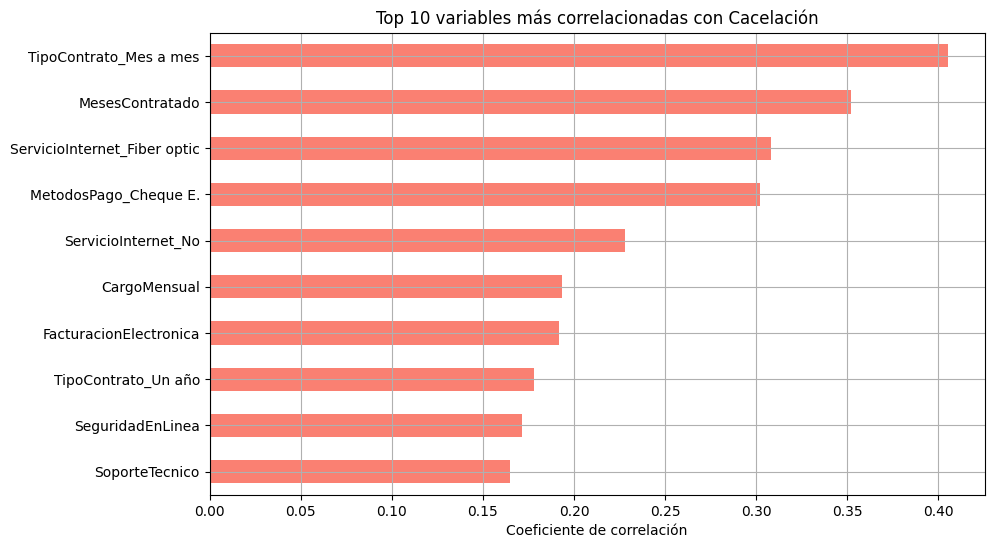

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

correlaciones_filtradas = correlaciones.drop('Cancelacion')

top_vars = correlaciones_filtradas.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_vars.plot(kind='barh', color='salmon')
plt.title('Top 10 variables m√°s correlacionadas con Cacelaci√≥n')
plt.xlabel('Coeficiente de correlaci√≥n')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

/tmp/ipython-input-539437461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelacion', y='MesesContratado', data=df_encoded, palette={'False':'lightblue', 'True':'salmon'})


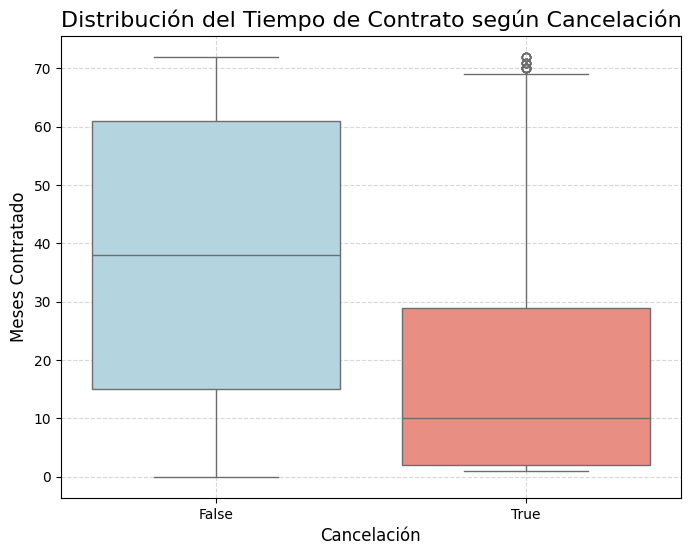

In [187]:
#An√°lisis Dirigido

#Tiempo de Contrato(MesesContratado) vs Cancelaci√≥n

plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='MesesContratado', data=df_encoded, palette={'False':'lightblue', 'True':'salmon'})
plt.title("Distribuci√≥n del Tiempo de Contrato seg√∫n Cancelaci√≥n", fontsize=16)
plt.xlabel("Cancelaci√≥n", fontsize=12)
plt.ylabel("Meses Contratado", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [188]:
#CargoTotal vs Cancelaci√≥n

df_encoded['CargoTotal'] = df_encoded['MesesContratado']*df_encoded['CargoMensual']

/tmp/ipython-input-409657452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelacion', y='CargoTotal', data=df_encoded, palette={'False':'lightblue', 'True':'salmon'})


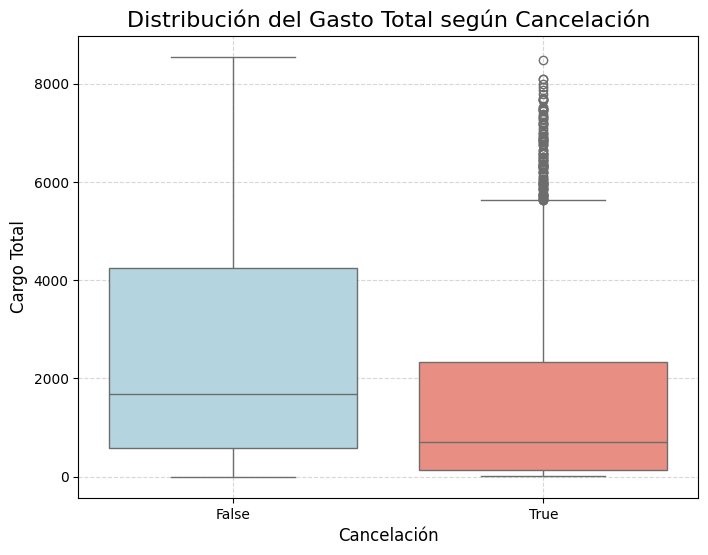

In [189]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='CargoTotal', data=df_encoded, palette={'False':'lightblue', 'True':'salmon'})
plt.title("Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n", fontsize=16)
plt.xlabel("Cancelaci√≥n", fontsize=12)
plt.ylabel("Cargo Total", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [190]:
#Modelado Predictivo

In [191]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [193]:
y_pred_rf = rf_model.predict(X_test)

In [194]:
print("üéØ RANDOM FOREST")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

üéØ RANDOM FOREST
[[875 160]
 [157 217]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1035
        True       0.58      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [195]:
#Regresi√≥n Log√≠stica

from sklearn.linear_model import LogisticRegression

In [196]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_norm, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [197]:
y_pred_log = log_model.predict(X_test_norm)

In [198]:
print("üìà REGRESI√ìN LOG√çSTICA")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

üìà REGRESI√ìN LOG√çSTICA
[[838 197]
 [123 251]]
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1035
        True       0.56      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



  **- ¬øCu√°l modelo tuvo el mejor desempe√±o?**

El modelo de Random Forest mostr√≥ un mejor desempe√±o general, con una accuracy de 0.78 y un equilibrio m√°s alto entre precisi√≥n y recall en la clase mayoritaria (clientes que no cancelan). Sin embargo, el modelo de Regresi√≥n Log√≠stica logr√≥ un mejor recall (0.67) y mejor f1-score (0.61) en la clase minoritaria (clientes que cancelan), lo cual es relevante si el objetivo es detectar cancelaciones a tiempo.



  **- ¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes.**

  Ninguno de los modelos muestra se√±ales claras de overfitting o underfitting. Ambos lograron m√©tricas equilibradas en el conjunto de prueba, sin que haya una ca√≠da brusca en rendimiento.

Sin embargo, podr√≠a considerarse que:

Random Forest podr√≠a beneficiarse de una validaci√≥n adicional para confirmar que no est√° sobreajustando a los datos balanceados artificialmente con SMOTE.

Regresi√≥n Log√≠stica podr√≠a estar captando bien las tendencias, pero su menor precisi√≥n sugiere que puede cometer falsos positivos (marcar como cancelaci√≥n cuando no lo es).

In [199]:
#An√°lisis de la Importancia de las Variables

/tmp/ipython-input-3050688297.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importances_df.head(10), palette='Blues_r')


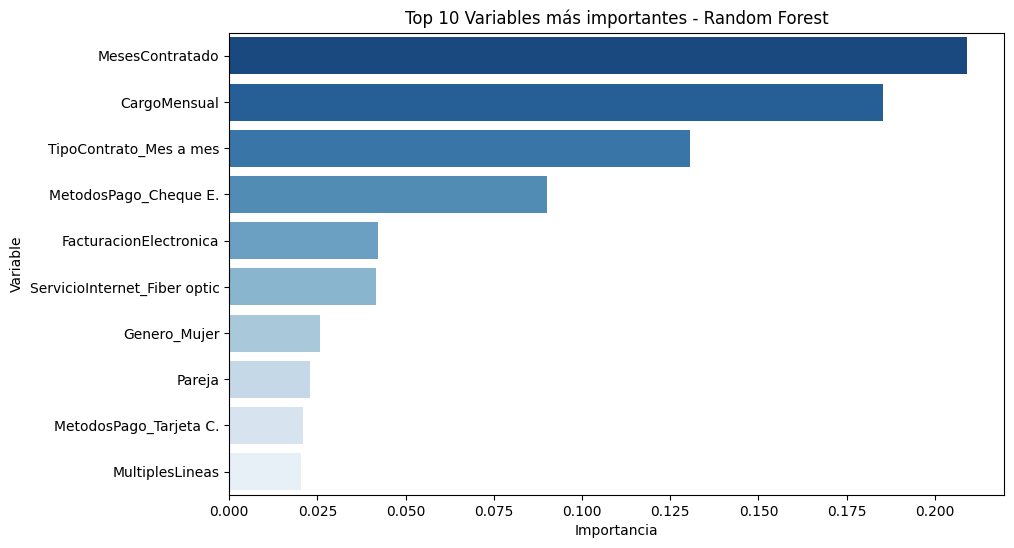

In [200]:
#Random Forest

importances = rf_model.feature_importances_
features = X_train.columns

feature_importances_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=feature_importances_df.head(10), palette='Blues_r')
plt.title("Top 10 Variables m√°s importantes - Random Forest")
plt.show()

In [201]:
#Regresi√≥n Log√≠stica

coeficientes = log_model.coef_[0]
variables = X_train_norm.columns

coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
coef_df["Importancia Absoluta"] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia Absoluta', ascending=False)

/tmp/ipython-input-3516713948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3516713948.py:14: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


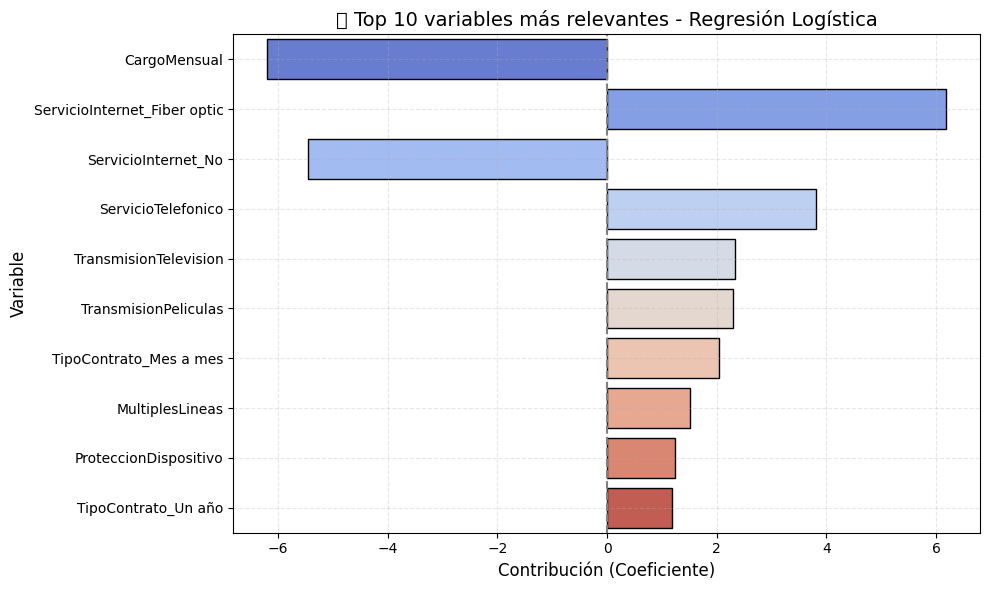

In [202]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Coeficiente',
    y='Variable',
    data=coef_df.head(10),
    palette='coolwarm',
    edgecolor='black'
)
plt.title("üîé Top 10 variables m√°s relevantes - Regresi√≥n Log√≠stica", fontsize=14)
plt.xlabel("Contribuci√≥n (Coeficiente)", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#**Conclusi√≥n**

Tras realizar el an√°lisis de correlaci√≥n, modelado predictivo y evaluaci√≥n de importancia de variables, se identificaron los principales factores asociados a la cancelaci√≥n de clientes, as√≠ como el desempe√±o de distintos modelos de predicci√≥n.

### Factores que m√°s influyen en la cancelaci√≥n, seg√∫n los coeficientes de la Regresi√≥n Log√≠stica, las variables con mayor influencia en la cancelaci√≥n fueron:

  - Servicio de Internet (Fiber Optic o No): Quienes utilizan fibra √≥ptica mostraron una mayor probabilidad de cancelar, al igual que quienes no poseen servicio de internet. Esto puede reflejar una experiencia de servicio deficiente o falta de percepci√≥n de valor.

  - Cargo Mensual: Cuanto m√°s alto es el cargo mensual, menor es la probabilidad de cancelaci√≥n, lo que sugiere que los clientes con planes m√°s completos o servicios premium tienen mayor lealtad.

  -Tipo de Contrato (Mes a mes): Esta modalidad se asocia con una mayor tasa de cancelaci√≥n, ya que ofrece menor compromiso.

  - Transmisi√≥n de Televisi√≥n o Pel√≠culas: Tambi√©n se observaron como factores relevantes, posiblemente vinculados a la percepci√≥n de calidad del servicio multimedia.

### Comparaci√≥n de modelos

Se entrenaron y evaluaron dos modelos:

  - Random Forest (sin normalizaci√≥n): obtuvo una accuracy del 78%, con buena capacidad para predecir tanto cancelaciones como no cancelaciones.

  - Regresi√≥n Log√≠stica (con normalizaci√≥n): logr√≥ una accuracy del 77%, pero con mejor recall para los casos positivos (cancelaciones), lo que lo hace √∫til si el objetivo es detectar clientes en riesgo de abandonar el servicio.

Ambos modelos presentaron rendimientos balanceados, sin indicios claros de overfitting o underfitting.

### Estrategias de retenci√≥n sugeridas

Basados en los factores m√°s influyentes, se proponen las siguientes estrategias:

  - Fomentar contratos a largo plazo, ofreciendo beneficios por migrar de ‚Äúmes a mes‚Äù a contratos anuales.

  - Revisar la experiencia del usuario con fibra √≥ptica, ya que es un punto sensible que est√° empujando a los clientes a cancelar.

  - Ofrecer paquetes personalizados o descuentos a clientes con cargos bajos, que podr√≠an percibir menor valor en el servicio.

  - Monitorear la satisfacci√≥n con los servicios de transmisi√≥n, ya que son parte clave de la propuesta de valor.